# Linear Discrimnant Analysis & Visualization

### Load required packages

In [1]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import pickle
import re
import pandas as pd
import numpy as np
from collections import Counter,defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

In [2]:
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary

In [24]:
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
          'text.usetex': False,
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

### Loading Data from pickle file

In [3]:
start = time()
texts = pickle.load(open("../data/texts.pickle","rb"))
corpus = pickle.load(open("../data/corpus.pickle","rb"))
id2word = pickle.load(open("../data/id2word.pickle","rb"))
end = time()
print("took {} seconds".format(end-start))

took 2.2012109756469727 seconds


### Train LDA & Get Coherence Score

In [4]:
# Takes around 2 mins
start = time()
try:
    lda_model = pickle.load(open("../data/lda_mp_11_topics_55295_songs.pickle", 'rb'))
except FileNotFoundError:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=11, 
                                               random_state=100,
                                               update_every=1,
                                               chunksize=100,
                                               passes=10,
                                               alpha='symmetric',
                                               per_word_topics=True)
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
pprint(lda_model.print_topics())
end = time()
print("took {} seconds".format(end-start))


Coherence Score:  0.4147088692339334
[(0,
  '0.054*"let" + 0.046*"come" + 0.042*"dance" + 0.038*"go" + 0.028*"get" + '
  '0.028*"rock" + 0.020*"shake" + 0.017*"everybody" + 0.016*"sing" + '
  '0.015*"song"'),
 (1,
  '0.035*"get" + 0.027*"little" + 0.026*"man" + 0.019*"ain\'t" + 0.017*"back" '
  '+ 0.016*"i\'m" + 0.014*"go" + 0.012*"well" + 0.010*"old" + 0.009*"take"'),
 (2,
  '0.143*"love" + 0.028*"baby" + 0.024*"know" + 0.021*"heart" + 0.020*"i\'ll" '
  '+ 0.019*"give" + 0.017*"make" + 0.016*"i\'m" + 0.016*"never" + 0.015*"one"'),
 (3,
  '0.032*"know" + 0.031*"go" + 0.029*"i\'m" + 0.025*"say" + 0.022*"time" + '
  '0.018*"think" + 0.017*"never" + 0.014*"see" + 0.013*"one" + 0.013*"tell"'),
 (4,
  '0.118*"girl" + 0.031*"boy" + 0.029*"good" + 0.026*"say" + 0.021*"ya" + '
  '0.020*"call" + 0.019*"look" + 0.017*"da" + 0.017*"know" + 0.016*"home"'),
 (5,
  '0.090*"gonna" + 0.059*"night" + 0.051*"tonight" + 0.039*"na" + 0.036*"i\'m" '
  '+ 0.032*"we\'re" + 0.027*"light" + 0.024*"right" + 0.

### Visualiza clustered results through pyLDAvis 

In [5]:
# Takes around 4mins
start  = time()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
end = time()
print("took {} seconds".format(end-start))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


took 189.61818289756775 seconds


In [6]:
pyLDAvis.enable_notebook()
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.113787 -0.087630       1        1  19.693123
7     -0.030280  0.127791       2        1  15.642047
2     -0.094169 -0.117987       3        1  13.875365
10    -0.063683 -0.214570       4        1  10.712964
6     -0.078775  0.072537       5        1   9.862980
1     -0.060812  0.055582       6        1   8.407600
0     -0.026462  0.073642       7        1   5.872408
4     -0.039425  0.011751       8        1   5.353014
9      0.014383  0.250914       9        1   5.115525
5     -0.051542 -0.118605      10        1   4.042622
8      0.544552 -0.053425      11        1   1.422344, topic_info=     Category           Freq       Term          Total  loglift  logprob
62    Default  167034.000000       love  167034.000000  30.0000  30.0000
74    Default   94931.000000         oh   94931.000000  29.0000  29.0000
110   Default   83332.000000       yeah   83332.000000  28.0000  28.0000
38    Default   55924.000000       girl   55924.000000  27.0000  27.0000
184   Default   41528.000000      gonna   41528.000000  26.0000  26.0000
661   Default   22750.000000         la   22750.000000  25.0000  25.0000
8     Default   89352.000000       baby   89352.000000  24.0000  24.0000
37    Default  182557.000000        get  182557.000000  23.0000  23.0000
537   Default   60984.000000       want   60984.000000  22.0000  22.0000
59    Default   64357.000000        let   64357.000000  21.0000  21.0000
71    Default   37618.000000      night   37618.000000  20.0000  20.0000
51    Default  159701.000000        i'm  159701.000000  19.0000  19.0000
113   Default   42581.000000      wanna   42581.000000  18.0000  18.0000
48    Default   27158.000000        hey   27158.000000  17.0000  17.0000
77    Default   22620.000000        ooh   22620.000000  16.0000  16.0000
921   Default   19661.000000      dance   19661.000000  15.0000  15.0000
205   Default   17319.000000    tonight   17319.000000  14.0000  14.0000
125   Default   75525.000000       come   75525.000000  13.0000  13.0000
70    Default   24481.000000      nigga   24481.000000  12.0000  12.0000
60    Default  110875.000000       like  110875.000000  11.0000  11.0000
39    Default  106455.000000         go  106455.000000  10.0000  10.0000
594   Default   12284.000000         na   12284.000000   9.0000   9.0000
16    Default   20051.000000        boy   20051.000000   8.0000   8.0000
171   Default   17139.000000      we're   17139.000000   7.0000   7.0000
198   Default   14393.000000       rock   14393.000000   6.0000   6.0000
31    Default   59375.000000       feel   59375.000000   5.0000   5.0000
85    Default   81547.000000        say   81547.000000   4.0000   4.0000
187   Default   30122.000000     little   30122.000000   3.0000   3.0000
321   Default   29773.000000       good   29773.000000   2.0000   2.0000
46    Default   35254.000000      heart   35254.000000   1.0000   1.0000
...       ...            ...        ...            ...      ...      ...
5573  Topic11     615.737244        mow     616.662476   4.2514  -5.2049
2240  Topic11     593.516296    dreamer     594.441833   4.2513  -5.2417
4179  Topic11     558.551086        una     559.476257   4.2512  -5.3024
2275  Topic11     514.001953       como     514.927124   4.2511  -5.3855
4651  Topic11     503.177002    runaway     504.102234   4.2510  -5.4068
2286  Topic11     464.846283       para     465.771454   4.2509  -5.4861
4176  Topic11     438.596558         ti     439.521729   4.2508  -5.5442
6243  Topic11     424.863647       ella     425.788849   4.2507  -5.5760
4839  Topic11     422.510284    spanish     423.435547   4.2507  -5.5815
4187  Topic11     386.227234       dale     387.152435   4.2505  -5.6713
4152  Topic11     386.128937     cuerpo     387.054108   4.2505  -5.6716
6498  Topic11     385.940521        oom     386.865753   4.2505  -5.6721
5430  Topic11     356.154938         su    

### Construct a dataframe for weights of words of each topic 

In [7]:
def format_topics_sentences(ldamodel, corpus=corpus, texts=texts):
    # Init output
    
    data  = []
    sent_topics_df = pd.DataFrame()
    
    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        topics = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        for dom_topic,perc_contr in topics:
            word_topic_effects = [(prop,id2word[wi]) for wi,tp in row[2] for t,prop in tp if t == dom_topic]
            word_topic_effects.sort(reverse=True)
            data.append([i,dom_topic,perc_contr,word_topic_effects])
    sent_topics_df = pd.DataFrame(data,columns = ['Song_ID','Topic', 'Perc_Contribution', 'Topic_Keywords'])

    return(sent_topics_df)

In [8]:
# Takes a really long time to run

song_data_df = format_topics_sentences(lda_model)
print(song_data_df.shape)
song_data_df.head()

(278319, 4)


,Song_ID,Topic,Perc_Contribution,Topic_Keywords
0,0,7,0.588035,"[(17.885664, sauce), (17.493374, ain't), (13.9..."
1,0,9,0.147485,"[(10.076369, yeah), (9.816701, hey), (5.965368..."
2,0,1,0.120599,"[(10.0985985, enough), (5.0528474, ain't), (4...."
3,0,3,0.084021,"[(5.1298976, go), (4.1810746, much), (3.706655..."
4,0,2,0.033627,"[(3.1765425, enough), (2.073642, much), (0.785..."


In [9]:
# Takes a really long time to run

cat_word_freq = {}
word_freq = defaultdict(float)

for topic in song_data_df.Topic.unique():
    tmp_df = song_data_df[song_data_df.Topic == topic]
    word_freq_topic = defaultdict(float)
    for i,r in tmp_df.iterrows():
        for w,k in r["Topic_Keywords"]:
            word_freq_topic[k] += r["Perc_Contribution"] * w
            word_freq[k] += w * r["Perc_Contribution"]
    cat_word_freq[topic] = word_freq_topic


In [10]:
p_cat_word_freq = {}
for k in cat_word_freq:
    topic = cat_word_freq[k]
    tot_words = sum(topic.values())
    p_cat_word_freq[k] = {w:topic[w]/tot_words for w in topic}
tot_n_words = sum(word_freq.values())
p_word_freq = {w:word_freq[w]/tot_n_words for w in word_freq}

In [11]:
relevance = lambda td,w,l: np.log(td[w])*l+(1-l)*np.log(td[w]/p_word_freq[w])
top_30 = {}
for k in p_cat_word_freq:
    topic = p_cat_word_freq[k]
    top_30[k]=sorted([(relevance(topic,w,0.2),w) for w in topic],reverse=True)
    print(k)
    print(top_30[k][:30])   

7
[(0.44739967274201475, 'nigga'), (0.3677850883349687, 'bitch'), (0.3416340258191326, 'fuck'), (0.3051823862244334, 'shit'), (0.16158777398762836, 'gon'), (0.14561141562634183, 'money'), (0.08605364320043285, 'hoe'), (0.07959020285583396, 'pop'), (0.06064105526540042, "'em"), (0.047781118331454486, "i'ma"), (0.03997422805788742, 'wit'), (0.007924948783015306, 'lil'), (0.007852757197568616, "y'all"), (-0.023740077929508274, 'ayy'), (-0.02442403465669596, 'hit'), (-0.0313115391973291, 'pussy'), (-0.03533325082751837, 'gang'), (-0.039217559627931164, 'club'), (-0.04956676624163148, 'tryna'), (-0.07877238958616872, 'dick'), (-0.08072181069267637, 'whip'), (-0.08197829096122455, 'bang'), (-0.08259451272989127, 'bounce'), (-0.08557376805304995, 'hood'), (-0.08871683858617607, 'shawty'), (-0.08995188645427032, 'drop'), (-0.09050825600509627, 'yo'), (-0.10611592121999913, 'dope'), (-0.10833721109458194, 'rap'), (-0.11198522244042941, 'check')]
9
[(2.2426436283202515, 'yeah'), (2.1164738499633

## Visualize the word weights through word cloud

In [18]:
def pretty_wordcloud(topic_num,title = ""):
    bott = top_30[topic_num][-1][0]
    freq = {w:p-bott for p,w in top_30[topic_num] if w not in cat_spec_stop_words[topic_num]}
    wc = WordCloud(background_color='white',width=900,height=500, max_words=50,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(freq)
    plt.imshow(wc, interpolation='bilinear')
    if title:
        #plt.title()
        #plt.suptitle(title,fontsize = 64)
        title_str = title+" (Coherence: {:5.4f})".format(coherence_model_lda.get_coherence_per_topic()[topic_num])
        print(title_str)
        plt.title(title_str,fontsize=32)
    plt.axis("off")
    plt.show()

In [21]:
"\\Huge \text{{"+"test"+"}}"

'\\Huge \text{{test}}'

In [19]:
cat_spec_stop_words = defaultdict(set)
i_2_cat_title = defaultdict(str)

      Affection:
Affection (Coherence: 0.3817)


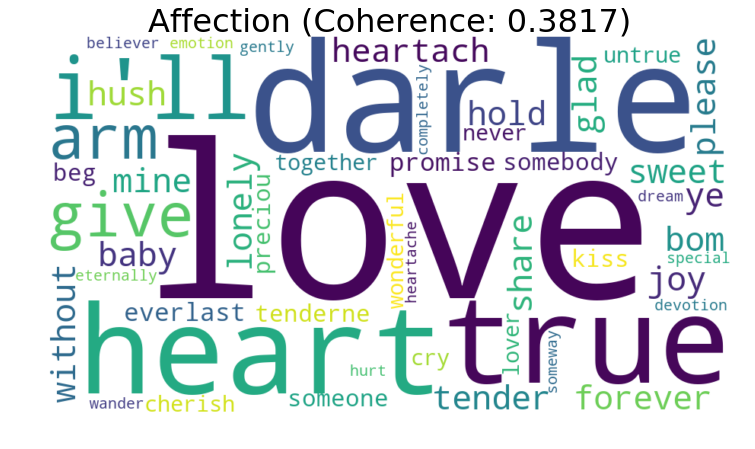

In [25]:
cat_spec_stop_words[2].update({})
print("      Affection:")
pretty_wordcloud(2,"Affection")# Affection
i_2_cat_title[2] = "Affection"

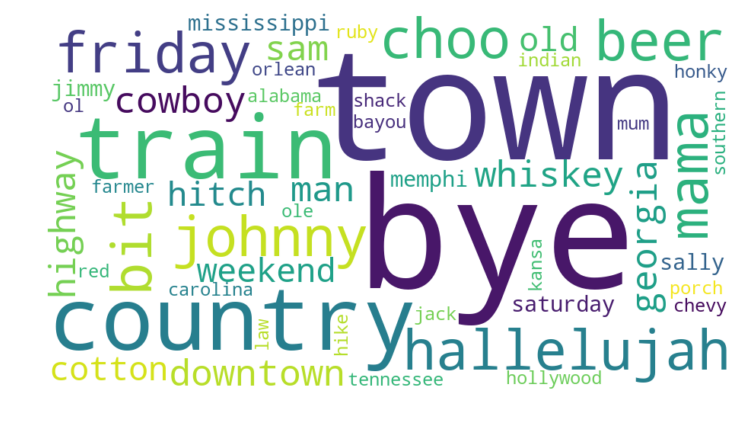

In [26]:
cat_spec_stop_words[1].update({"get","little"})
pretty_wordcloud(1)# country
i_2_cat_title[1] = "Country"

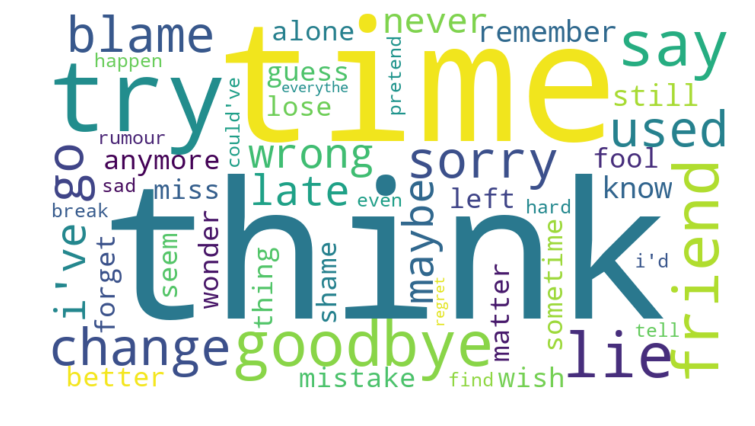

In [27]:
cat_spec_stop_words[3].update({})
pretty_wordcloud(3)# psyche
i_2_cat_title[3] = "Psyche/Regret"

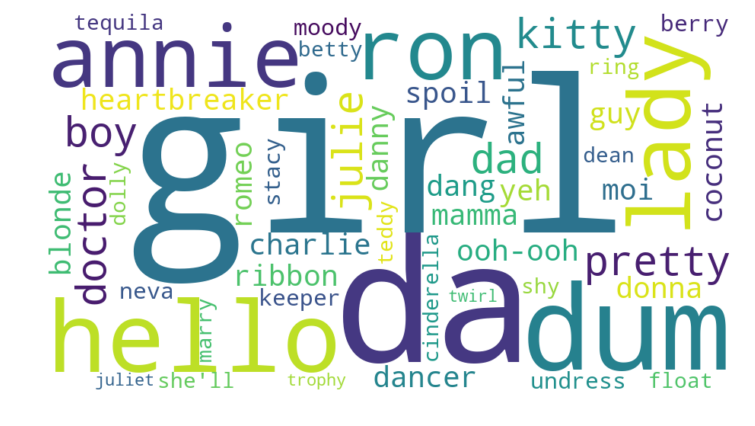

In [28]:
cat_spec_stop_words[4].update({"ding","dee","dong","du","doom"})
pretty_wordcloud(4)# people
i_2_cat_title[4] = "People"

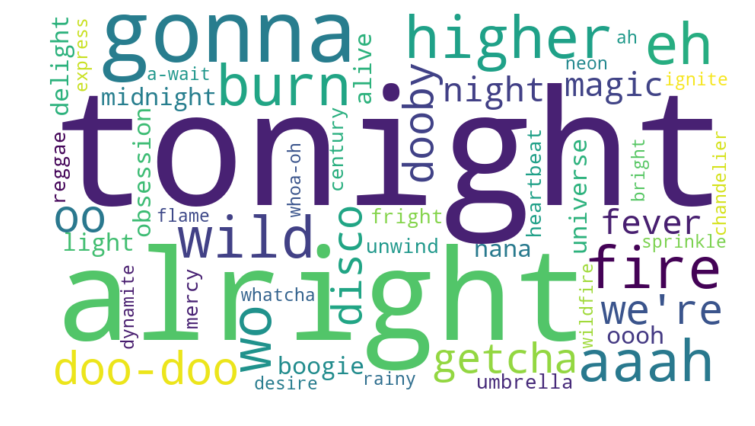

In [29]:
cat_spec_stop_words[5].update({"na","doo"})
pretty_wordcloud(5)# craze/party
i_2_cat_title[5] = "Craze/Party"

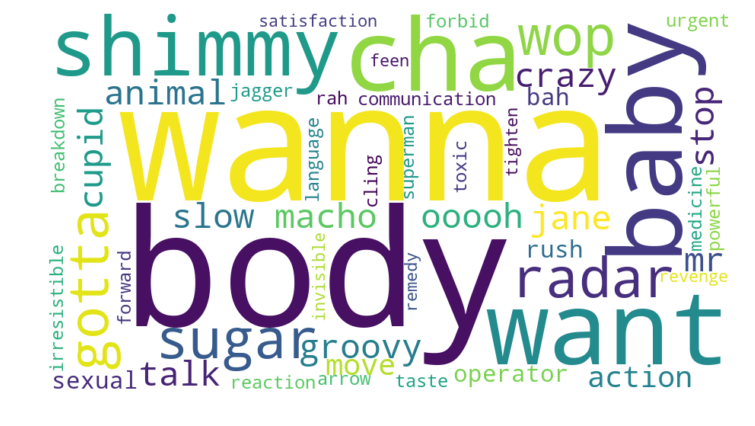

In [30]:
cat_spec_stop_words[6].update({})
pretty_wordcloud(6)# desire
i_2_cat_title[6] = "Desire"

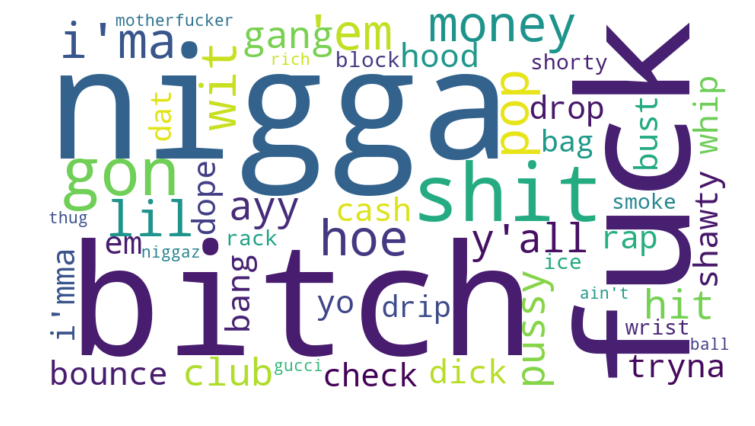

In [31]:
cat_spec_stop_words[7].update({"get","i'm","like"})
pretty_wordcloud(7)# hip-hop
i_2_cat_title[7] = "Hip-Hop"

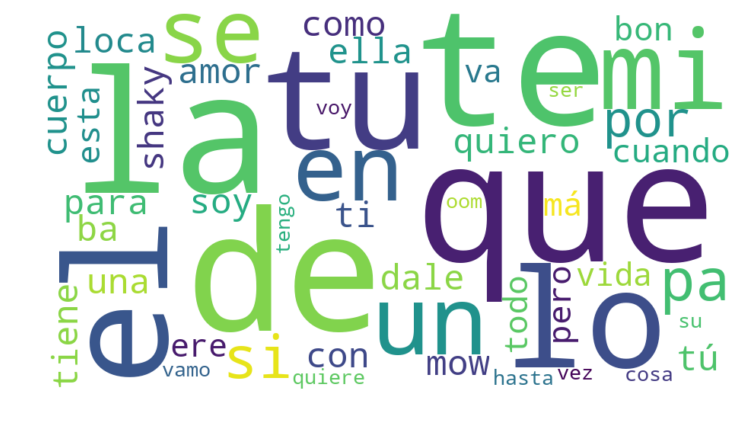

In [32]:
cat_spec_stop_words[8].update({})
pretty_wordcloud(8)# foreign songs
i_2_cat_title[8] = "Foreign Songs"

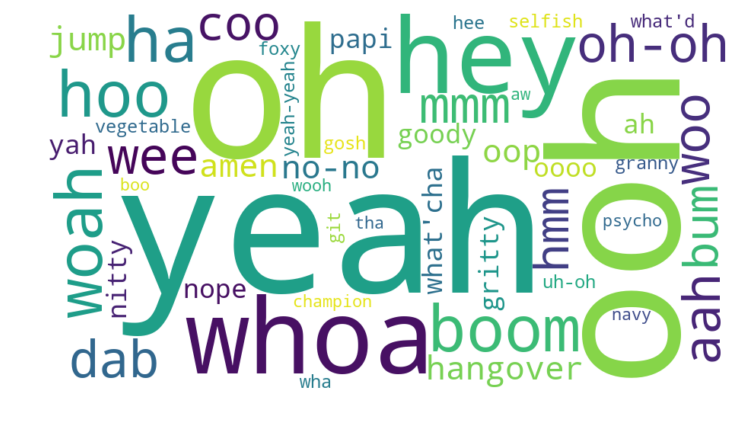

In [33]:
cat_spec_stop_words[9].update({})
pretty_wordcloud(9)# noise/sounds
i_2_cat_title[9] = "Noise/Sounds"

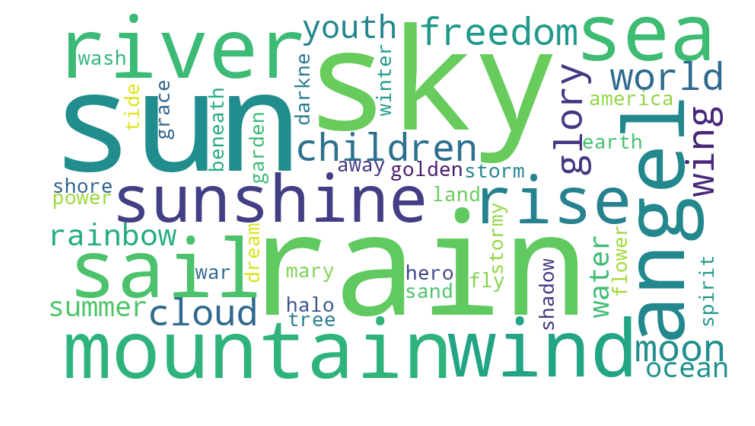

In [34]:
cat_spec_stop_words[10].update({})
pretty_wordcloud(10)# world/earth
i_2_cat_title[10] = "World/Earth"

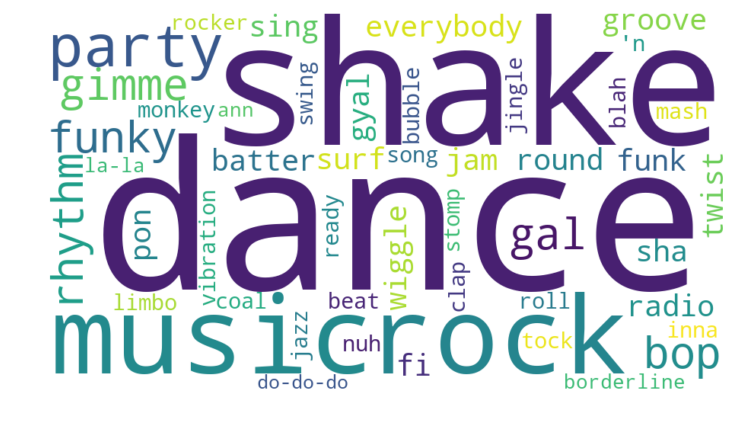

In [35]:
cat_spec_stop_words[0].update({"get","come","let"})
pretty_wordcloud(0)# dance/rhythm
i_2_cat_title[0] = "Dance/Rhythm"